# Linear Regression

## Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import CleaningCars as hf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
# def load_data():    
#     csv_path = os.path.join('data', 'vehicles.csv')
#     return pd.read_csv(csv_path)

# df = load_data()

# df_processed = hf.ultimateClean(df)

# df_processed.to_csv('data/df_processed.csv')

## Feature Selection

In [3]:
df = pd.read_csv("data/df_processed.csv")

In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [5]:
df.head()

,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,2010.0,1,32742.0,32.590000,-85.480000,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,7500,2014.0,1,93600.0,32.547500,-85.468200,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4900,2006.0,1,87046.0,32.616807,-85.464149,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2000,1974.0,1,190000.0,32.861600,-85.216100,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,19500,2005.0,1,116000.0,32.547500,-85.468200,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [6]:
df = df.loc[df["price"] > 0]

In [7]:
Y = df.pop("price")
# Y = np.log(Y)
columns = df.columns
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = columns)

In [8]:
df.describe()

,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,drive_4wd,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
count,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,...,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000,360878.000000
mean,0.918015,0.982548,0.344350,0.415980,0.661021,0.149782,0.549892,0.112526,0.187800,0.360535,...,0.531074,0.016233,0.000003,0.000795,0.963913,0.010059,0.018278,0.006745,0.000175,0.000033
std,0.063714,0.130948,0.217156,0.129407,0.181683,0.356858,0.497505,0.316012,0.390553,0.480156,...,0.499034,0.126369,0.001665,0.028190,0.186507,0.099788,0.133954,0.081849,0.013212,0.005766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.892562,1.000000,0.159063,0.331683,0.502049,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.933884,1.000000,0.332107,0.433417,0.723568,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.958678,1.000000,0.497038,0.502164,0.794958,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X = df.values
Y = Y.values

In [10]:
remove = True
while remove == True:
    mod = sm.OLS(Y, df)
    res = mod.fit()
    pval = pd.DataFrame(res.pvalues)
    if len(pval.loc[pval[0] > 0.05]) == 0:
        remove = False
    else:
        worst_col =pval.loc[pval[0] > 0.05].T.columns[pval.loc[pval[0] > 0.05][0].argmax()]
        print(worst_col , pval.loc[pval[0] > 0.05].max()[0])
        df = df.drop([worst_col], axis = 1)
        
    

tfidf_0 0.9932464688457718
tfidf_8 0.999305283598839
state_az 0.8750186173272763
state_fl 0.918583439145848
state_in 0.5963011819382156
state_sd 0.6309563543067018
status_missing 0.5715321331452271
state_wv 0.3468857249484032
state_ne 0.3531512200261149
state_co 0.3741460985337963
state_nv 0.34785274422762624
state_ky 0.3398544683884208
tfidf_9 0.22426376622469202
tfidf_5 0.41762493081053054
state_de 0.09125000385827435
state_ga 0.05727907874551588


In [11]:
pval.loc[pval[0] > 0.05]

,0


In [12]:
df.columns

Index(['year', 'condition', 'odometer', 'lat', 'long', 'color_black',
       'color_other', 'color_silver', 'color_white', 'drive_4wd', 'drive_fwd',
       'drive_other', 'drive_rwd', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'status_clean',
       'status_lien', 'status_parts only', 'status_rebuilt', 'status_salvage',
       'state_ak', 'state_al', 'state_ar', 'state_ca', 'state_ct', 'state_dc',
       'state_hi', 'state_ia', 'state_id', 'state_il', 'state_ks', 'state_la',
       'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo',
       'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_nh', 'state_nj',
       'state_nm', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_tn', 'state_tx', 'state_ut', 'state_va',
       'state_vt', 'state_wa', 'state_wi', 'state_wy', 'cylinders_4 cylinders',
       'cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_missing',
       'fue

## Predicting Log of Price

In [36]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(Y), test_size=0.20, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
mean_squared_error(reg.predict(X_train), y_train), mean_squared_error(reg.predict(X_test), y_test)

(0.8067908068505781, 5.886040160882078e+18)

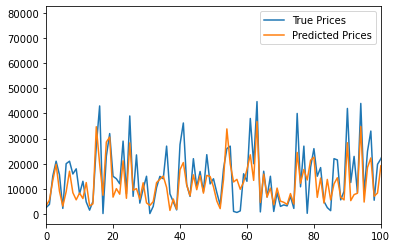

In [47]:
plt.plot(np.exp(y_test), label = "True Prices")
# plt.plot(np.exp(reg.predict(X_test)))
plt.plot(np.exp(reg.predict(X_test)),label =  "Predicted Prices")
plt.xlim(0, 100)
plt.legend()

## KFold Cross Validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
kf5 = KFold(n_splits=6, shuffle=False)


In [17]:
def model(X_train, y_train, X_test, y_test, log):

    reg = LinearRegression().fit(X_train, y_train)
    if log == False:
        return(mean_squared_error(reg.predict(X_train), y_train), mean_squared_error(reg.predict(X_test), y_test))
    else:
        return(mean_squared_error(np.exp(reg.predict(X_train)), np.exp(y_train)), mean_squared_error(np.exp(reg.predict(X_test)), np.exp(y_test)))

In [18]:
def kfold_val(X, Y, log):
    res = []
    for index, (train_index, test_index) in enumerate(kf5.split(range(len(X)))):
        if index < 5:
            res.append(model(X[train_index], Y[train_index], X[test_index], Y[test_index], log))
    return(np.array(res))

In [19]:
kfold_res = kfold_val(X, Y, log = False)

In [20]:
print("Training MSE: ", kfold_res[:, 0])
print("Testing MSE: ", kfold_res[:, 1])

Training MSE:  [52440349.7875111  51605970.02278116 54334066.794671   52403187.11205991
 51938845.56539378]
Testing MSE:  [5.35794747e+07 1.81666360e+25 4.44014501e+07 5.43560151e+07
 5.61403093e+07]


In [21]:
kfold_log = kfold_val(X, np.log(Y), log = True)

In [30]:
print("Training MSE: ",np.mean(np.sqrt(kfold_log[:, 0])))
print("Testing MSE: ", np.mean(np.sqrt(kfold_log[:, 1])))

Training MSE:  7835.153822711693
Testing MSE:  8166.315364879441


## Interpret Error in predictions

For normal price prediction

In [23]:
print("Can Expect an error in prediction of: ", round(np.mean(np.sqrt(kfold_res[:-1, 1]))), " ± ", round(np.std(np.sqrt(kfold_res[:-1, 1]))))

Can Expect an error in prediction of:  1065558426744  ±  1845601321223


For log price prediction

In [24]:
print("Can Expect an error in prediction of: ", round(np.mean(np.sqrt(kfold_log[:-1, 1]))), " ± ", round(np.std(np.sqrt(kfold_log[:-1, 1]))))

Can Expect an error in prediction of:  8069  ±  444
